In [0]:
# Install TensorFlow
import tensorflow as tf

In [33]:
tf.__version__

'2.2.0-rc2'

In [0]:
# Define Constants
batch_size = 3000
num_classes = 10
epochs = 100

In [35]:
# Load MNIST data, split between train and test sets
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

img_rows = 28
img_cols = 28

x_test_origin = x_test  # x_test 의 원본 저장

input_shape = (img_rows, img_cols, 1)
x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)

x_train, x_test = x_train / 255.0, x_test / 255.0


print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [36]:
print(y_train[0])

5


In [0]:
# convert class vectors to binary class matrices
y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes)

In [38]:
print(y_train[0])

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [0]:
# Build the tf.keras.Sequential model by stacking layers.

model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(64, 3, strides=(1, 1), padding='same', activation='relu', input_shape=(28, 28,1)),
  tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),
  tf.keras.layers.Conv2D(128, 2, strides=(1, 1), padding='same', activation='relu'),
  tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),
  tf.keras.layers.Conv2D(256, 2, strides=(1, 1), padding='same', activation='relu'),
  tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),
  tf.keras.layers.Conv2D(512, 2, strides=(1, 1), padding='same', activation='relu'),
  tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.GlobalAveragePooling2D(),
  tf.keras.layers.Dense(1000, activation='relu'),
  tf.keras.layers.Dropout(0.5),
  tf.keras.layers.Dense(500, activation='relu'),
  tf.keras.layers.Dropout(0.5),
  tf.keras.layers.Dense(200, activation='relu'),
  tf.keras.layers.Dropout(0.5),
  tf.keras.layers.Dense(num_classes, activation='softmax')])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [0]:
# Save the best model as digits_model.h5
modelCheckpoint = tf.keras.callbacks.ModelCheckpoint('digits_model.h5', save_best_only=True)

# Define a callback to monitor val_loss
monitor_val_lose = tf.keras.callbacks.EarlyStopping(monitor='val_loss', 
                       patience=5)

In [41]:
# Train the model using the early stopping callback
history = model.fit(x_train, y_train, 
                    validation_data=(x_test, y_test),
                    epochs=epochs, batch_size=batch_size,
                    callbacks=[monitor_val_lose,modelCheckpoint])

Epoch 1/100
20/20 [==============================] - 10s 482ms/step - loss: 1.9428 - accuracy: 0.2915 - val_loss: 0.9063 - val_accuracy: 0.7163
Epoch 2/100
20/20 [==============================] - 10s 476ms/step - loss: 0.6587 - accuracy: 0.7696 - val_loss: 0.1968 - val_accuracy: 0.9371
Epoch 3/100
20/20 [==============================] - 10s 475ms/step - loss: 0.2218 - accuracy: 0.9352 - val_loss: 0.0873 - val_accuracy: 0.9730
Epoch 4/100
20/20 [==============================] - 9s 474ms/step - loss: 0.1219 - accuracy: 0.9656 - val_loss: 0.0528 - val_accuracy: 0.9822
Epoch 5/100
20/20 [==============================] - 9s 472ms/step - loss: 0.0858 - accuracy: 0.9754 - val_loss: 0.0411 - val_accuracy: 0.9873
Epoch 6/100
20/20 [==============================] - 9s 473ms/step - loss: 0.0704 - accuracy: 0.9805 - val_loss: 0.0393 - val_accuracy: 0.9869
Epoch 7/100
20/20 [==============================] - 9s 472ms/step - loss: 0.0583 - accuracy: 0.9835 - val_loss: 0.0349 - val_accuracy: 0.9

In [42]:
# Show History
model.evaluate(x_test,  y_test, verbose=2)

313/313 - 2s - loss: 0.0282 - accuracy: 0.9921


[0.028163161128759384, 0.9921000003814697]

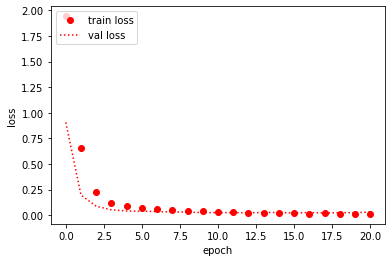

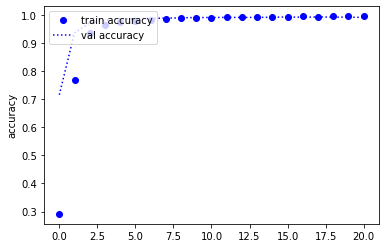

In [43]:
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots()
fig, acc_ax = plt.subplots()

loss_ax.plot(history.history['loss'], 'ro', label='train loss')
loss_ax.plot(history.history['val_loss'], 'r:', label='val loss')
loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
loss_ax.legend(loc='upper left')

acc_ax.plot(history.history['accuracy'], 'bo', label='train accuracy')
acc_ax.plot(history.history['val_accuracy'], 'b:', label='val accuracy')
acc_ax.set_ylabel('accuracy')
acc_ax.legend(loc='upper left')

plt.show()

In [44]:
# Predict Model
import numpy as np
selected_digit = 7

result = model.predict(np.array([x_test[selected_digit]]))
result_number = np.argmax(result)
y_test_digit = y_test[selected_digit]
y_test_number = np.argmax(y_test_digit)
print(result, result_number)
print(y_test_digit, y_test_number)

[[3.45633707e-05 1.36567014e-05 2.45605279e-05 1.18385688e-04
  6.74637209e-04 5.40080473e-05 3.85431304e-06 1.04959356e-04
  6.09959883e-04 9.98361409e-01]] 9
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.] 9


[3.456337e-05, 1.3656701e-05, 2.4560528e-05, 0.00011838569, 0.0006746372, 5.4008047e-05, 3.854313e-06, 0.000104959356, 0.0006099599, 0.9983614]


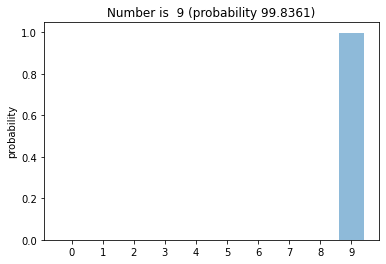

In [45]:
# Show Predicted Number
digits = ('0', '1', '2', '3', '4', '5', '6', '7', '8', '9')
y_pos = np.arange(len(digits))
performance = [ val for val in result[0]]
print(performance)
result_probability = performance[result_number]
plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, digits)
plt.ylabel('probability')
plt.title('Number is %2i (probability %7.4f)' % (result_number, result_probability*100))

plt.show()

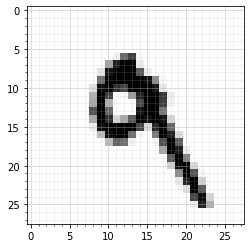

In [47]:
# Draw digit image
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

# Major ticks every 20, minor ticks every 5
major_ticks = np.arange(0, 29, 5)
minor_ticks = np.arange(0, 29, 1)

ax.set_xticks(major_ticks)
ax.set_xticks(minor_ticks, minor=True)
ax.set_yticks(major_ticks)
ax.set_yticks(minor_ticks, minor=True)

# And a corresponding grid
ax.grid(which='both')

# Or if you want different settings for the grids:
ax.grid(which='minor', alpha=0.2)
ax.grid(which='major', alpha=0.5)

ax.imshow(x_test_origin[selected_digit], cmap=plt.cm.binary)

plt.show()

In [48]:
print(x_test_origin[selected_digit])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  14 149 193   5   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0  91 224 253 253  19   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0  28 235 254 253 253 166  1